In [38]:
# Importing the neccesary modules

import pandas as pd
import numpy as np
import seaborn as sns; 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error

# Importing the dataset :-

In [5]:
dset = pd.read_csv('bank-additional-full.csv')
dset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


age (numeric)
job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
default: has credit in default? (categorical: “no”, “yes”, “unknown”)
housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
contact: contact communication type (categorical: “cellular”, “telephone”)
month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numeric)
poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
emp.var.rate: employment variation rate — (numeric)
cons.price.idx: consumer price index — (numeric)
cons.conf.idx: consumer confidence index — (numeric)
euribor3m: euribor 3 month rate — (numeric)
nr.employed: number of employees — (numeric)

In [6]:
dset.shape

(41188, 21)

In [7]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
 dset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [96]:
duplicate = dset.duplicated()
print(duplicate.sum())
dset[duplicate]

12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5196,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099,no


In [9]:
dset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
print ('No of people in original dataset : ' +str(len(dset.index)))

No of people in original dataset : 41188


## Analyzing data :

<AxesSubplot:xlabel='job', ylabel='count'>

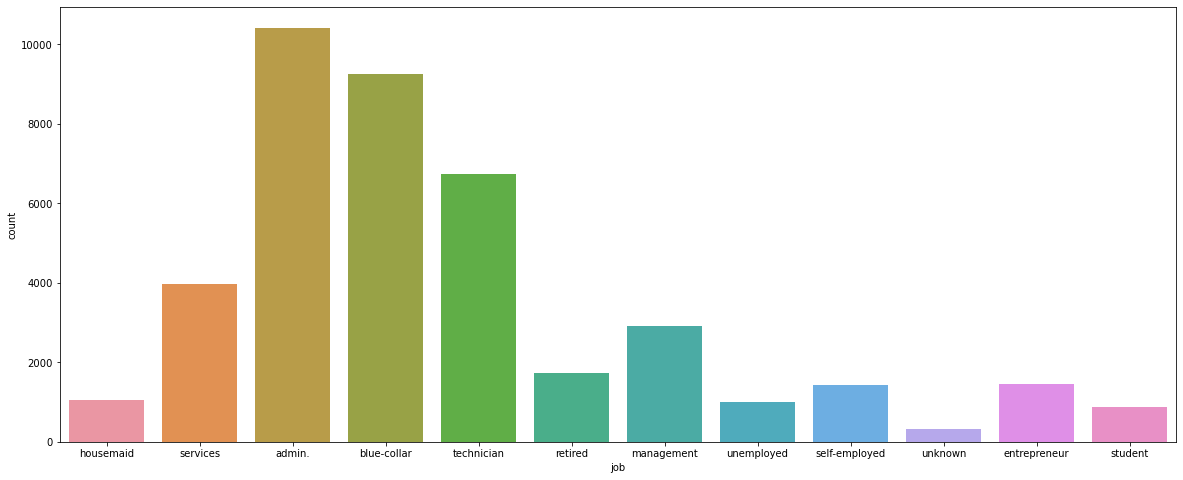

In [11]:
plt.figure(figsize = (20,8))
sns.countplot(x='job',data=dset)


<AxesSubplot:xlabel='marital', ylabel='count'>

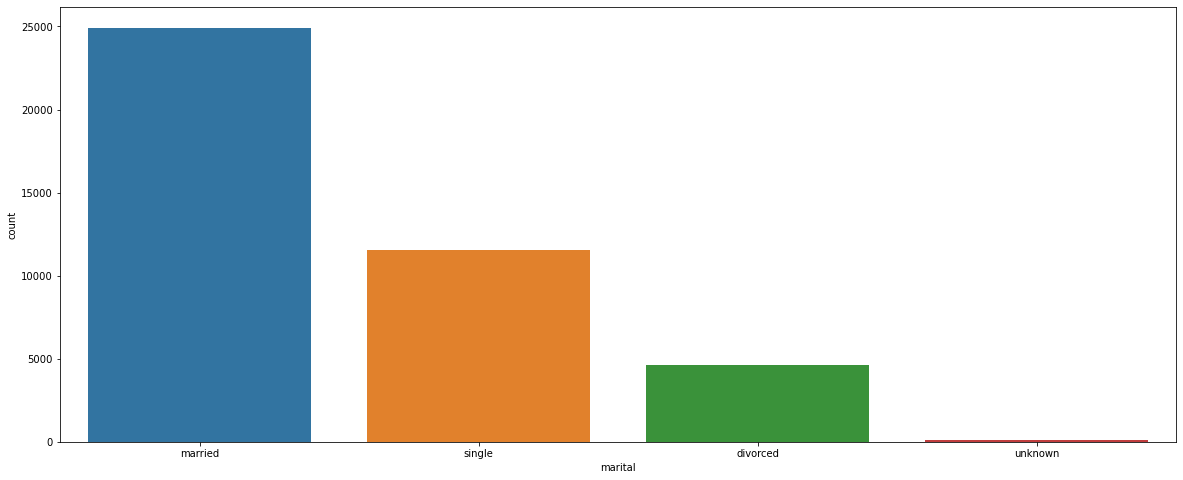

In [138]:
plt.figure(figsize = (20,8))
sns.countplot(x='marital',data=dset)

<AxesSubplot:xlabel='education', ylabel='count'>

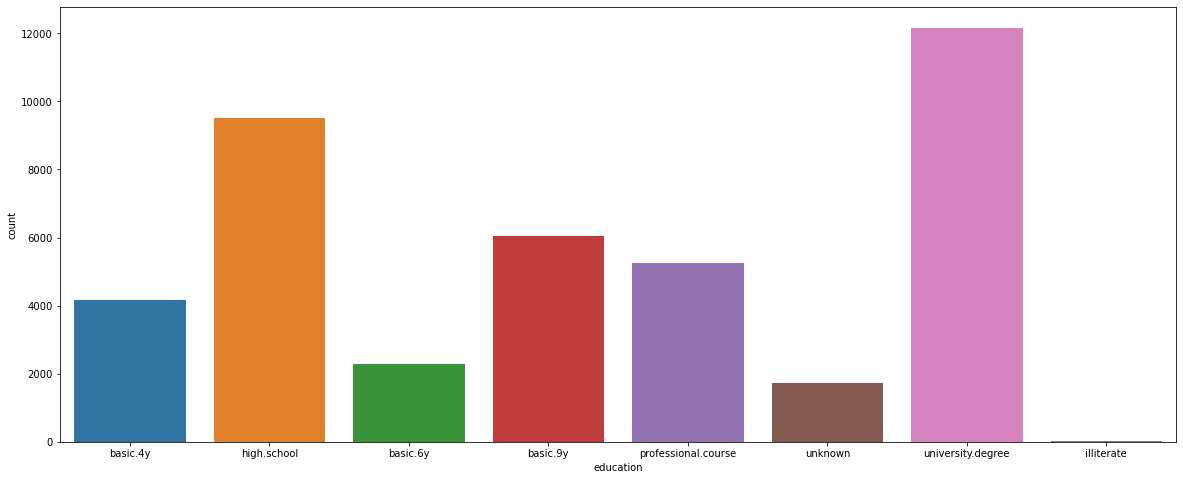

In [139]:
plt.figure(figsize = (20,8))
sns.countplot(x='education',data=dset)

<AxesSubplot:xlabel='default', ylabel='count'>

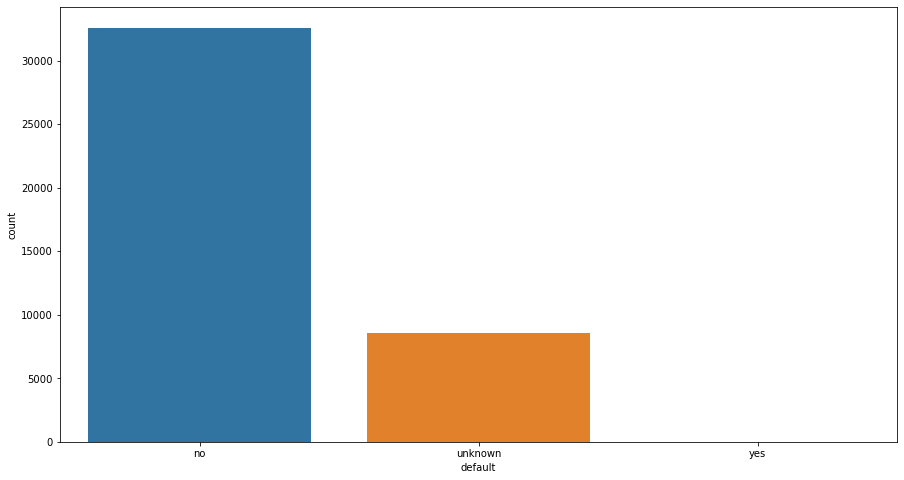

In [141]:
plt.figure(figsize = (15,8))
sns.countplot(x='default',data=dset)

<AxesSubplot:xlabel='housing', ylabel='count'>

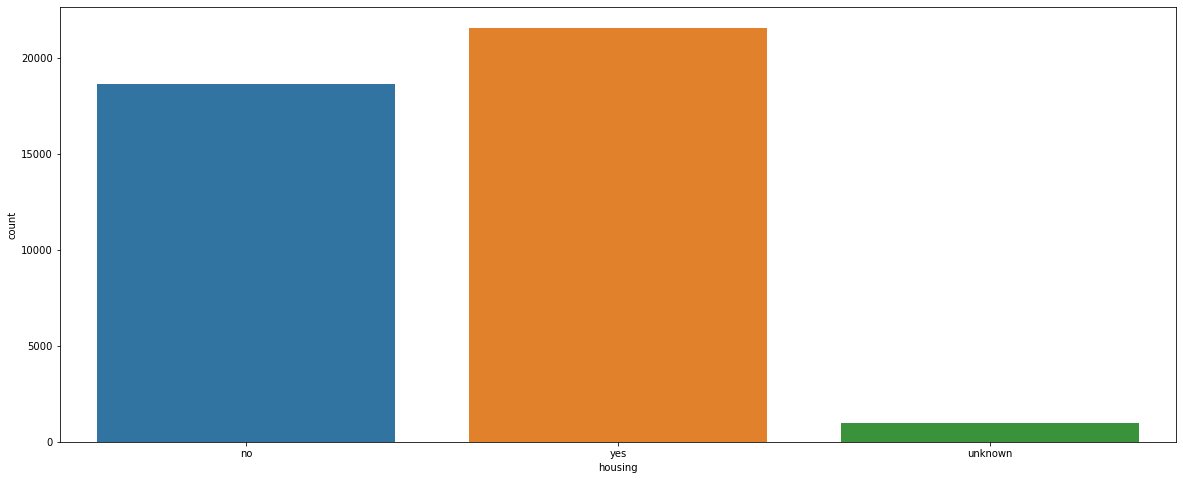

In [142]:
plt.figure(figsize = (20,8))
sns.countplot(x='housing',data=dset)

<AxesSubplot:xlabel='loan', ylabel='count'>

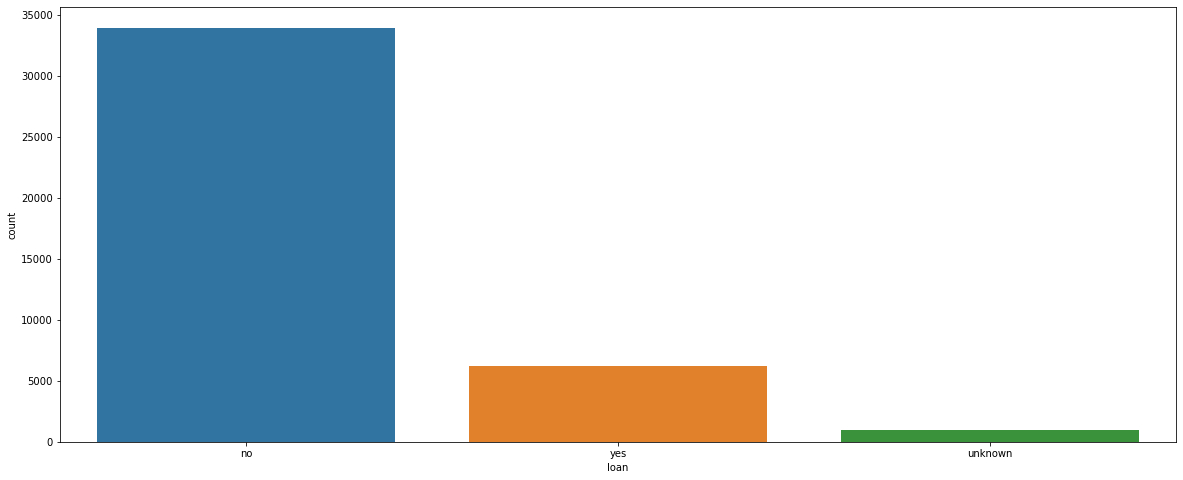

In [143]:
plt.figure(figsize = (20,8))
sns.countplot(x='loan',data=dset)

<AxesSubplot:xlabel='contact', ylabel='count'>

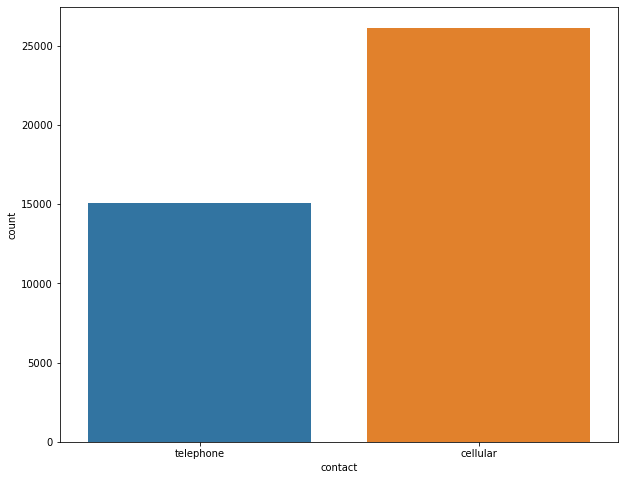

In [148]:
plt.figure(figsize = (10,8))
sns.countplot(x='contact',data=dset)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

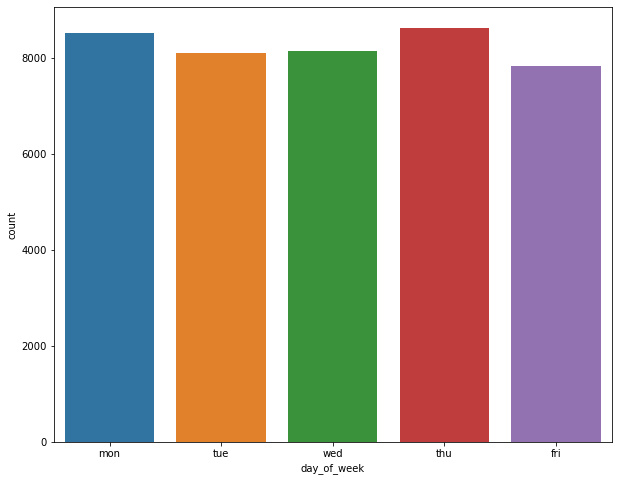

In [147]:
plt.figure(figsize = (10,8))
sns.countplot(x='day_of_week',data=dset)

<AxesSubplot:xlabel='month', ylabel='count'>

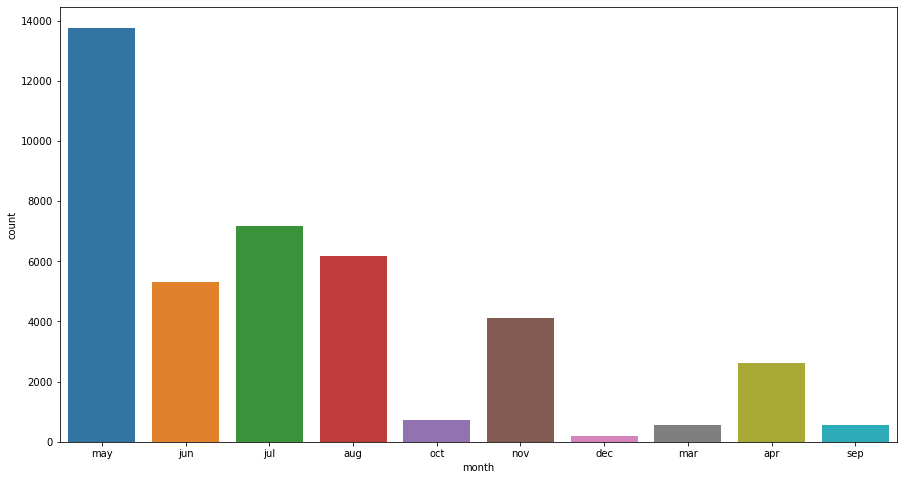

In [150]:
plt.figure(figsize = (15,8))
sns.countplot(x='month',data=dset)

In [394]:
dset.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
dset_rp= dset.replace({'married': 2, 'single': 1, 'divorced' : 3,'unknown':99,'housemaid' : 1, 'services' : 2, 'admin.' : 3, 'blue-collar' : 4, 'technician' : 5,'retired' : 6, 'management' : 7, 'unemployed' : 8, 'self-employed' : 9,'entrepreneur' : 10, 'student' : 11,'basic.4y' : 2, 'high.school' : 1, 'basic.6y' : 2, 'basic.9y' : 2,'professional.course' : 3,'university.degree' : 4,'illiterate' : 5,'yes' : 1, 'no' : 0,'telephone' : 1, 'cellular' : 2, 'mar' : 3, 'apr' : 4,'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9,'oct' : 10, 'nov' : 11, 'dec' : 12,'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 4, 'fri' : 5,'nonexistent' : 2, 'failure' : 0, 'success' : 1})

In [15]:
dset_rp

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,2,0,0,0,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
1,57,2,2,1,99,0,0,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
2,37,2,2,1,0,1,0,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
3,40,3,2,2,0,0,0,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
4,56,2,2,1,0,0,1,1,5,1,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,3,0,1,0,2,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4964,1
41184,46,4,2,3,0,0,0,2,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4964,0
41185,56,6,2,4,0,1,0,2,11,5,...,2,999,0,2,-1.1,94.767,-50.8,1.028,4964,0
41186,44,5,2,3,0,0,0,2,11,5,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4964,1


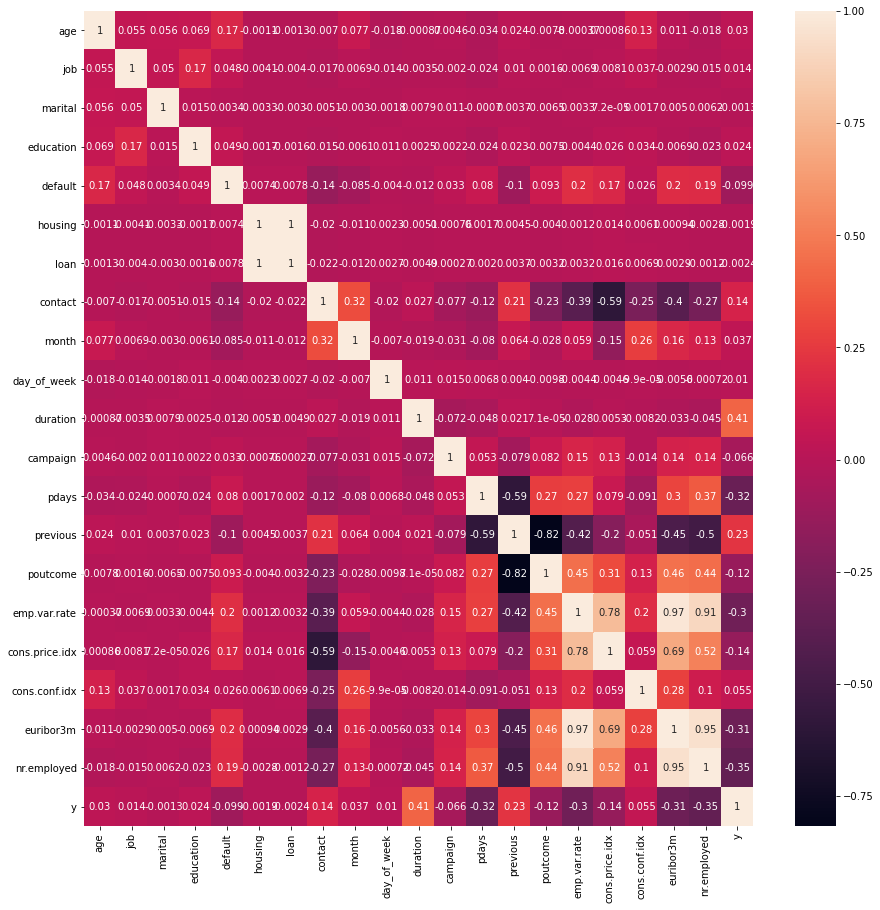

In [88]:
fig, ax = plt.subplots(figsize=(15,15))
corr=dset_rp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(30)
sns.heatmap(corr, annot=True)
plt.show()

# Splitting the dataset into training and test at a 70%/30% ratio:

In [16]:
columns=['age','job','marital','education','default','housing','loan','contact','month','duration','campaign',
        'pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx']

X = dset_rp[columns]
Y = dset_rp['y']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=25)
print("Size of train dataset :", X_train.shape)
print("Size of test dataset :", X_test.shape)

Size of train dataset : (28831, 17)
Size of test dataset : (12357, 17)


In [17]:
len(X_train)

28831

In [18]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
8726,39,3,1,1,0,0,0,1,6,172,2,999,0,2,1.4,94.465,-41.8
30619,50,10,2,2,0,1,0,1,5,331,5,999,0,2,-1.8,92.893,-46.2
31121,30,4,3,1,99,0,0,2,5,848,1,999,1,0,-1.8,92.893,-46.2
37287,33,3,2,1,0,1,0,2,8,252,1,6,1,1,-2.9,92.201,-31.4
38307,44,3,3,1,0,0,0,2,10,634,1,999,0,2,-3.4,92.431,-26.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,42,2,1,1,0,1,0,2,5,36,2,999,0,2,-1.8,92.893,-46.2
26767,36,4,2,2,0,0,0,2,11,768,3,999,0,2,-0.1,93.200,-42.0
6618,49,7,3,4,0,0,0,1,5,675,1,999,0,2,1.1,93.994,-36.4
24894,48,2,2,1,0,1,0,2,11,835,1,999,0,2,-0.1,93.200,-42.0


In [19]:
len(X_test)

12357

In [20]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
37499,32,2,2,1,0,0,0,2,8,100,1,999,0,2,-2.9,92.201,-31.4
23884,43,5,2,1,0,1,0,2,8,60,1,999,0,2,1.4,93.444,-36.1
32970,27,2,2,2,0,1,0,2,5,220,2,999,0,2,-1.8,92.893,-46.2
30374,28,3,2,4,0,0,0,2,4,115,2,999,1,0,-1.8,93.075,-47.1
12442,42,1,3,2,99,0,0,2,7,461,2,999,0,2,1.4,93.918,-42.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,50,9,2,2,99,0,0,1,5,23,1,999,0,2,1.1,93.994,-36.4
27829,32,11,1,4,0,0,0,2,3,61,11,999,0,2,-1.8,92.843,-50.0
9638,32,3,1,3,0,0,1,1,6,213,1,999,0,2,1.4,94.465,-41.8
3982,38,3,1,4,99,1,0,1,5,55,2,999,0,2,1.1,93.994,-36.4


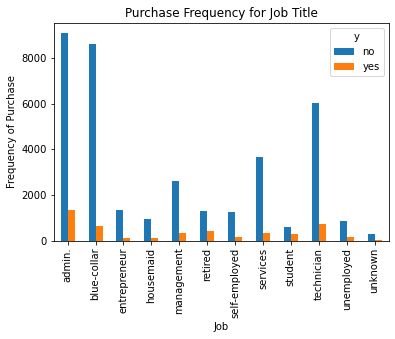

In [21]:
#purchase of different job variables 
pd.crosstab(dset.job,dset.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

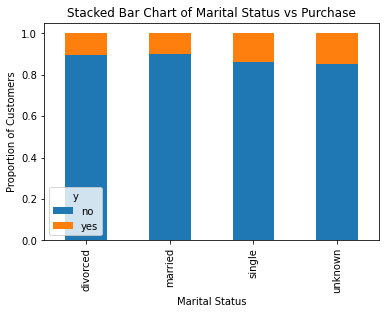

In [205]:
table=pd.crosstab(dset.marital,dset.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

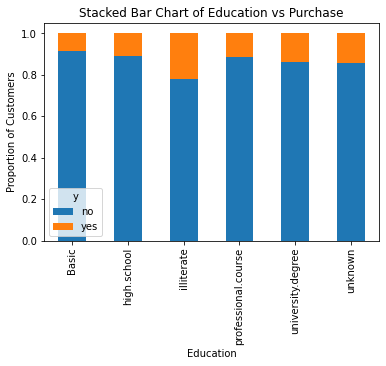

In [206]:
table=pd.crosstab(dset.education,dset.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

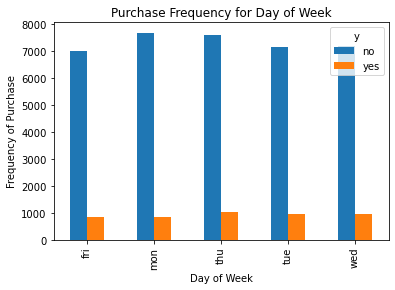

In [208]:
pd.crosstab(dset.day_of_week,dset.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

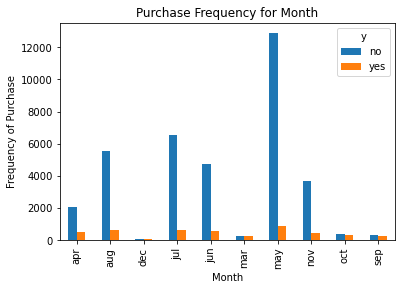

In [209]:
pd.crosstab(dset.month,dset.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

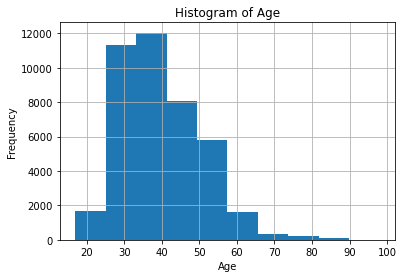

In [249]:
dset.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

# 1. Logistic Regression:

In [85]:
#Implementing Logistic Regression Model
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
y_pred = logmodel.predict(X_test)

/Users/suvinshah/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# LR - Accuracy, Recall, Precision :

In [332]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))
print('Precision:',metrics.precision_score(Y_test, y_pred))
print('Recall:',metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9048312697256615
Precision: 0.6502590673575129
Recall: 0.3565340909090909


In [342]:
print('Classification Report:')
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10949
           1       0.65      0.36      0.46      1408

    accuracy                           0.90     12357
   macro avg       0.79      0.67      0.70     12357
weighted avg       0.89      0.90      0.89     12357



In [353]:
#Confusion Matrix
print('Confusion Matrix:')
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)


Confusion Matrix:
[[10679   270]
 [  906   502]]


# Receiver Operating Characteristic(ROC) curve :

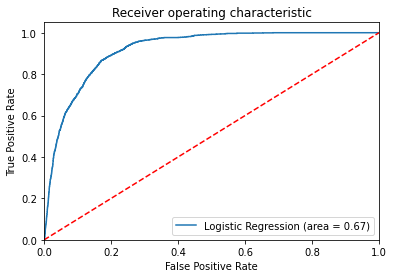

Area under Curve(AUC):
AUC: 0.9183802978063584


In [383]:
logit_roc_auc = roc_auc_score(Y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Area under Curve(AUC):")
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

auc_score = metrics.roc_auc_score(Y_test, y_pred_proba)
print('AUC:', auc_score)

# 2. Naive Bayes(NB) :

In [369]:
# Implementing Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_pred = nb.predict(X_test)

# NB - Accuracy, Recall, Precision :

In [371]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))
print('Precision:',metrics.precision_score(Y_test, y_pred))
print('Recall:',metrics.recall_score(Y_test, y_pred))

Accuracy: 0.8428421137816622
Precision: 0.3643292682926829
Recall: 0.5092329545454546


In [372]:
print('Classification Report:')
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10949
           1       0.36      0.51      0.42      1408

    accuracy                           0.84     12357
   macro avg       0.65      0.70      0.67     12357
weighted avg       0.87      0.84      0.85     12357



In [375]:
#Confusion Matrix
print('Confusion Matrix:')
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

Confusion Matrix:
[[9698 1251]
 [ 691  717]]


# Receiver Operating Characteristic(ROC) curve :

Area under Curve(AUC):
AUC: 0.8473172557788591
Plot Receiver Operating Characteristic(ROC)


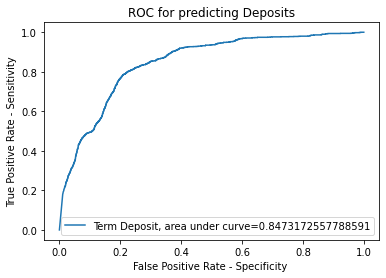

In [400]:
print("Area under Curve(AUC):")
y_pred_proba =nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

auc_score = metrics.roc_auc_score(Y_test, y_pred_proba)
print('AUC:', auc_score)

print("Plot Receiver Operating Characteristic(ROC)")
plt.plot(fpr,tpr,label="Term Deposit, area under curve="+str(auc_score))
plt.legend(loc=4)
plt.xlabel("False Positive Rate - Specificity ")
plt.ylabel("True Positive Rate - Sensitivity")
plt.title("ROC for predicting Deposits")
plt.show()


# 3.  K_Nearest Neighbor : 

In [384]:
#Implementing K_Nearest Neighbors model
kn = KNeighborsClassifier()
kn.fit(X_train, Y_train)
y_pred = kn.predict(X_test)

# KNN - Accuracy, Precision, Recall

In [385]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))
print('Precision:',metrics.precision_score(Y_test, y_pred))
print('Recall:',metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9001375738447843
Precision: 0.5931477516059958
Recall: 0.3934659090909091


In [386]:
print('Classification Report:')
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.94     10949
           1       0.59      0.39      0.47      1408

    accuracy                           0.90     12357
   macro avg       0.76      0.68      0.71     12357
weighted avg       0.89      0.90      0.89     12357



In [389]:
#Confusion Matrix
print('Confusion Matrix:')
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

Confusion Matrix:
[[10569   380]
 [  854   554]]


# Receiver Operating Characteristic(ROC) curve :

Area under Curve(AUC):
AUC: 0.8335749191499431
Plot Receiver Operating Characteristic(ROC)


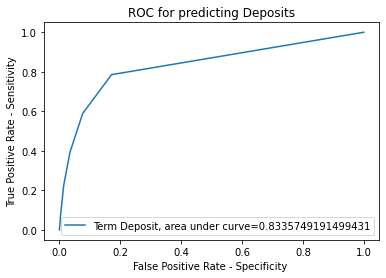

In [401]:
print("Area under Curve(AUC):")
y_pred_proba =kn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

auc_score = metrics.roc_auc_score(Y_test, y_pred_proba)
print('AUC:', auc_score)

print("Plot Receiver Operating Characteristic(ROC)")
plt.plot(fpr,tpr,label="Term Deposit, area under curve="+str(auc_score))
plt.legend(loc=4)
plt.xlabel("False Positive Rate - Specificity ")
plt.ylabel("True Positive Rate - Sensitivity")
plt.title("ROC for predicting Deposits")
plt.show()

# 4. Decision Tree (DT) :

In [391]:
#Implementing Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)

# DT - Accuracy, Precision, Recall :

In [392]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))
print('Precision:',metrics.precision_score(Y_test, y_pred))
print('Recall:',metrics.recall_score(Y_test, y_pred))

Accuracy: 0.8872703730678967
Precision: 0.5052779732582688
Recall: 0.5099431818181818


In [393]:
print('Classification Report:')
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10949
           1       0.51      0.51      0.51      1408

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [404]:
#Confusion Matrix
print('Confusion Matrix:')
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

Confusion Matrix:
[[10246   703]
 [  690   718]]


# Receiver Operating Characteristic(ROC) curve :

Area under Curve(AUC):
AUC: 0.7228682024717906
Plot Receiver Operating Characteristic(ROC)


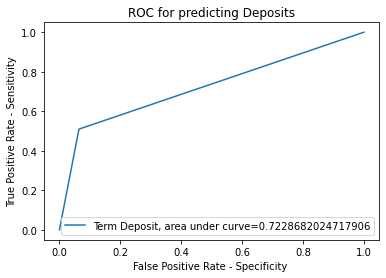

In [405]:
print("Area under Curve(AUC):")
y_pred_proba =dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

auc_score = metrics.roc_auc_score(Y_test, y_pred_proba)
print('AUC:', auc_score)

print("Plot Receiver Operating Characteristic(ROC)")
plt.plot(fpr,tpr,label="Term Deposit, area under curve="+str(auc_score))
plt.legend(loc=4)
plt.xlabel("False Positive Rate - Specificity ")
plt.ylabel("True Positive Rate - Sensitivity")
plt.title("ROC for predicting Deposits")
plt.show()

# 5. Random Forest (RF) :

In [406]:
#Implementation of Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)

# RF - Accuracy, Precision, Recall :

In [407]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))
print('Precision:',metrics.precision_score(Y_test, y_pred))
print('Recall:',metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9083110787407946
Precision: 0.6237623762376238
Recall: 0.4921875


In [408]:
print('Classification Report:')
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10949
           1       0.62      0.49      0.55      1408

    accuracy                           0.91     12357
   macro avg       0.78      0.73      0.75     12357
weighted avg       0.90      0.91      0.90     12357



In [411]:
#Confusion Matrix
print('Confusion Matrix:')
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

Confusion Matrix:
[[10531   418]
 [  715   693]]


# Receiver Operating Characteristic(ROC) curve :

Area under Curve(AUC):
AUC: 0.9332522908381007
Plot Receiver Operating Characteristic(ROC)


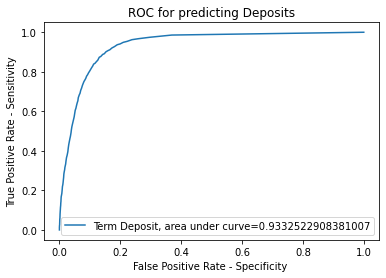

In [412]:
print("Area under Curve(AUC):")
y_pred_proba =rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

auc_score = metrics.roc_auc_score(Y_test, y_pred_proba)
print('AUC:', auc_score)

print("Plot Receiver Operating Characteristic(ROC)")
plt.plot(fpr,tpr,label="Term Deposit, area under curve="+str(auc_score))
plt.legend(loc=4)
plt.xlabel("False Positive Rate - Specificity ")
plt.ylabel("True Positive Rate - Sensitivity")
plt.title("ROC for predicting Deposits")
plt.show()

# 6. XGBoost Algorithm (XG) :

In [44]:
#Implementing XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)

/Users/suvinshah/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# XGBBoost - Accuracy, Precision, Recall :

In [45]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))
print('Precision:',metrics.precision_score(Y_test, y_pred))
print('Recall:',metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9118718135469774
Precision: 0.6425379803395889
Recall: 0.5106534090909091


In [46]:
print('Classification Report:')
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10949
           1       0.64      0.51      0.57      1408

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.90      0.91      0.91     12357



In [47]:
#Confusion Matrix
print('Confusion Matrix:')
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

Confusion Matrix:
[[10549   400]
 [  689   719]]


# Receiver Operating Characteristic(ROC) curve :

Area under Curve(AUC):
AUC: 0.9427575240370645
Plot Receiver Operating Characteristic(ROC)


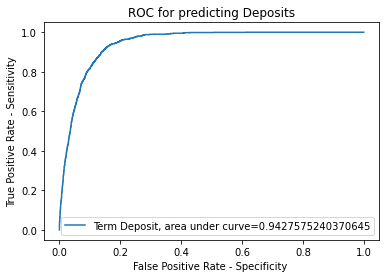

In [48]:
print("Area under Curve(AUC):")
y_pred_proba =xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

auc_score = metrics.roc_auc_score(Y_test, y_pred_proba)
print('AUC:', auc_score)

print("Plot Receiver Operating Characteristic(ROC)")
plt.plot(fpr,tpr,label="Term Deposit, area under curve="+str(auc_score))
plt.legend(loc=4)
plt.xlabel("False Positive Rate - Specificity ")
plt.ylabel("True Positive Rate - Sensitivity")
plt.title("ROC for predicting Deposits")
plt.show()

# Rerun some of the models by tuning some hyperparameters :

Tuning Decision Tree :

In [95]:
dt_tune1 = DecisionTreeClassifier(min_samples_split=50)
dt_tune1.fit(X_train, Y_train)
pred_tune1 = dt_tune1.predict(X_test)

dt = metrics.accuracy_score(Y_test,pred_tune1)
print("Accuracy of tuned decision tree :",dt)

pred_tune1 = precision_score(Y_test,pred_tune1)
print("Precision of tuned decision tree :",pred_tune1)

Accuracy of tuned decision tree : 0.9066925629198025
Precision of tuned decision tree : 0.6081424936386769


In [ ]:
Tuning Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, random_state=0,n_estimators=200)
rf.fit(X_train, Y_train)
rf_preds=rf.predict(X_test)
print('Tuned Random Forest:')
print('Accuracy : {}'.format(accuracy_score(Y_test, rf_preds)))
print('Precision : {}'.format(precision_score(Y_test, rf_preds)))
print('Recall : {}'.format(recall_score(Y_test, rf_preds)))
print('F1 Score : {}'.format(f1_score(Y_test, rf_preds)))

Random Forest
Accuracy : 0.9087966334870924
Precision : 0.6246672582076309
Recall : 0.5
F1 Score : 0.5554240631163708
